In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (8,8)
import wave
import pyaudio
from audio2numpy import open_audio
from IPython.display import Audio
from scipy import signal
from scipy.io.wavfile import write

In [2]:
Fs = 48000
Ts = 1/Fs
Nyq = Fs/2
t = np.arange(0,2,Ts)
f = 1000

In [3]:
x = np.sin(2*np.pi*f*t)

In [4]:
Audio(x,rate=Fs)

### convert seconds to samples

In [5]:
timeSec = 1.5
timeSamples = np.fix(timeSec * Fs)

In [6]:
timeSamples

72000.0

In [7]:
timeMS = 330
timeSec1 = timeMS/1000
timeSamples1 = np.fix(timeSec1 * Fs)

In [8]:
timeSamples1

15840.0

In [9]:
beatsPerMin = 90
beatsPerSec = beatsPerMin / 60
secPerBeat = 1/beatsPerSec

noteDiv = 1

timeSec = noteDiv * secPerBeat

timeSamples = np.fix(timeSec * Fs)

timeSamples

32000.0

In [10]:
timeSec

0.6666666666666666

### Echosync

In [11]:
filename = "textbookcode-master\Ch_13\AcGtr.wav"
[x,Fs] = open_audio(filename)

In [12]:
Audio(x,rate=Fs)

In [13]:
beatsPerMin = 102
beatsPerSec = beatsPerMin / 60
secPerBeat = 1/beatsPerSec
noteDiv = 0.5 # half note
timeSec = noteDiv * secPerBeat # timefor each note and delay time of 1 beat

In [14]:
d = np.fix(timeSec * Fs) # convert to samples
b = 0.75 # gain

In [15]:
d

12970.0

In [16]:
len(x)

312346

In [17]:
y = np.concatenate((x[:int(d)], x[int(d):] + b*x[:int(-d)]))

In [18]:
len(y)

312346

In [19]:
Audio(y,rate=Fs)

## Feedback echo

In [20]:
filename = "textbookcode-master\Ch_13\AcGtr.wav"
[x,Fs] = open_audio(filename)

In [21]:
beatsPerMin = 102
beatsPerSec = beatsPerMin / 60
secPerBeat = 1/beatsPerSec

In [22]:
noteDiv = 0.5
timeSec = noteDiv * secPerBeat
d = int(np.fix(timeSec*Fs))
a = -0.75

In [23]:
N = len(x)
y = np.zeros(N)

In [24]:
for i in range(N):
    if i < d:
        y[i] = x[i]
    else:
        y[i] = x[i] + (-a)*y[i-d]

In [25]:
Audio(y,rate=Fs)

### Impulse Response

In [26]:
Fs = 48000
N = Fs*2

In [27]:
imp = np.zeros(N)
imp[0] = 1 # set first sample to 1

In [28]:
d1 = int(0.5*Fs) # 1/2 second delay
b1 = 0.7 # gain of 2nd delay line

In [29]:
d2 = int(1.5*Fs) #1.5 sec delay
b2 = 0.5 # gain of 2nd delay line

In [30]:
pad = np.zeros(int(d2))
impPad = np.concatenate((pad, imp))

In [31]:
impPad.shape


(168000,)

In [48]:
out = np.zeros(N)

In [49]:
for i in range(N):
    index = i + d2
    out[i] = impPad[index] + b1*impPad[index - d1] + b2*impPad[index - d2]


Text(0.5, 1.0, 'Output Impulse Response')

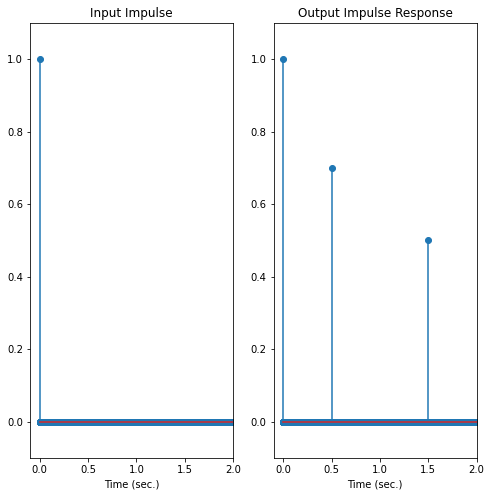

In [50]:
t = np.arange(0,N)/Fs

plt.subplot(1,2,1)
plt.stem(t,imp) # Plot the impulse response
plt.axis([-0.1, 2, -0.1, 1.1])
plt.xlabel('Time (sec.)')
plt.title('Input Impulse')

plt.subplot(1,2,2)
plt.stem(t,out) #Plot the impulse response
plt.axis([-0.1, 2, -0.1, 1.1])
plt.xlabel('Time (sec.)')
plt.title('Output Impulse Response')
# Save the impulse response for future use
#audiowrite('impResp.wav',out,Fs);


In [35]:
# Save the impulse response for future use
#write('impResp.wav',Fs,out);

### infinite impulse response

In [36]:
Fs = 48000
N = Fs*2
Ts = 1/Fs

out = np.zeros(10*Fs)
out.shape

(480000,)

In [37]:
imp = np.zeros(N)
imp[0] = 1 # set first sample to 1

d1 = int(0.5*Fs) # 1/2 second delay
a1 = -0.7 # gain of 2nd delay line

In [38]:
for i in range(0,d1):
    out[i] = imp[i]

In [39]:
for i in range(d1,Fs*2):
    out[i] = imp[i] + a1*out[i-d1]

In [40]:
for i in range(Fs*2, Fs*10):
    out[i] = a1*out[i-d1]

Text(0.5, 1.0, 'Output Impulse Response')

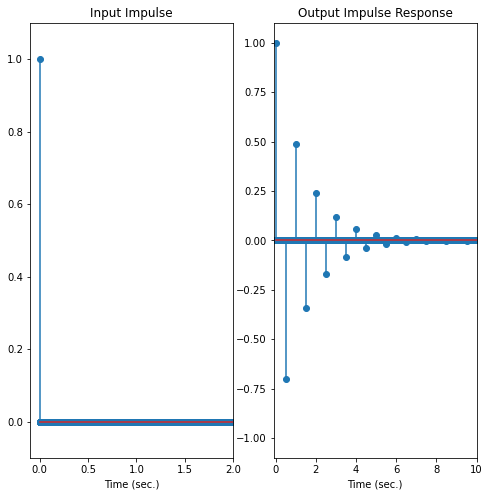

In [42]:
t = np.arange(0,N)/Fs
t2 = np.arange(0, len(out))*Ts

plt.subplot(1,2,1)
plt.stem(t,imp) # Plot the impulse response
plt.axis([-0.1, 2, -0.1, 1.1])
plt.xlabel('Time (sec.)')
plt.title('Input Impulse')

plt.subplot(1,2,2)
plt.stem(t2,out) #Plot the impulse response
plt.axis([-0.1, 10, -1.1, 1.1])
plt.xlabel('Time (sec.)')
plt.title('Output Impulse Response')
# Save the impulse response for future use
#write('impResp.wav',out,Fs);

## Convolution

In [47]:
x = np.zeros(2*Fs) # 2 second long input signal
f = 4
t=np.arange(0,0.25*Fs)/Fs
#t = [0:Fs*0.25 – 1]/Fs;
x[:int(Fs*0.25)] = np.sin(2*np.pi*f*t)

In [52]:
y=np.convolve(x,out)

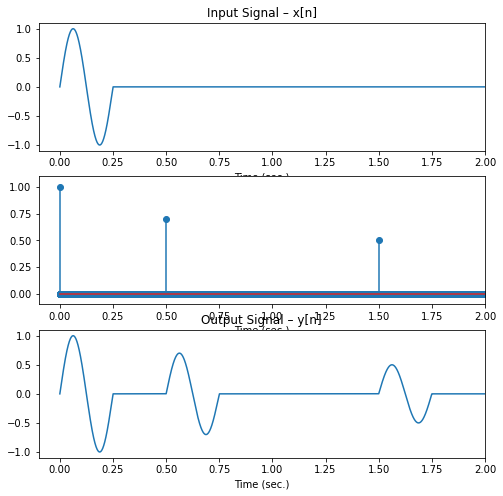

In [56]:
xAxis = np.arange(0,len(out))/Fs
plt.subplot(3,1,1)
plt.plot(xAxis,x) # Plot the impulse response
plt.axis([-0.1, 2, -1.1, 1.1])
plt.xlabel('Time (sec.)')
plt.title('Input Signal – x[n]')
plt.subplot(3,1,2)
plt.stem(xAxis,out) # Plot the impulse response
plt.axis([-0.1, 2, -0.1, 1.1])
plt.xlabel('Time (sec.)')
plt.subplot(3,1,3)
plt.plot(xAxis,y[:2*Fs])# Plot the impulse response
plt.axis([-0.1, 2, -1.1, 1.1])
plt.xlabel('Time (sec.)')
plt.title('Output Signal – y[n]');

### reverb convolution

In [67]:
fileAcGtr = "textbookcode-master\Ch_13\AcGtr.wav"
fileRevIR = "reverbIR.wav"
[x,Fs] = open_audio(fileAcGtr)
[h,_] = open_audio(fileRevIR)

In [78]:
h[:5,0]

array([0., 0., 0., 0., 0.], dtype=float32)

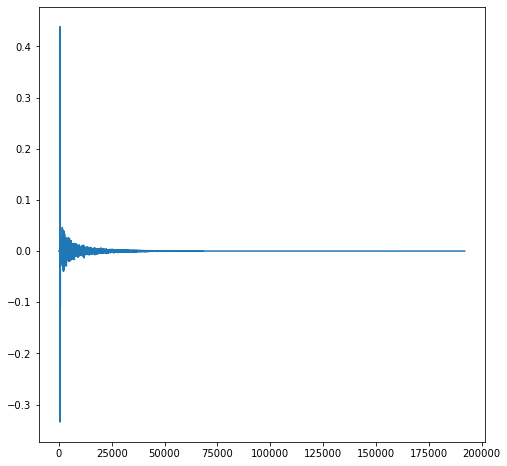

In [79]:
plt.plot(h[:,0])

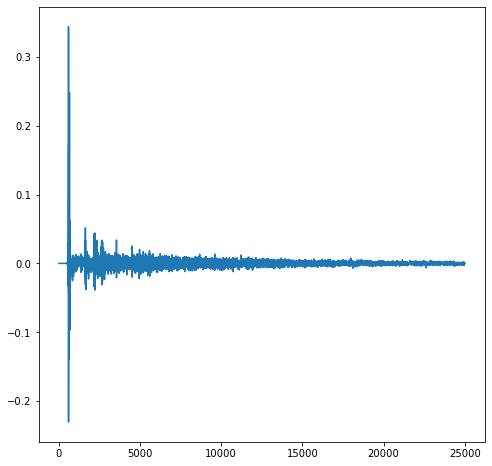

In [81]:
plt.plot(h[:25000,1])

In [82]:
yLeft = np.convolve(x,h[:,0])
yRight = np.convolve(x,h[:,1])
y = [yLeft,yRight]

Audio(y,rate=Fs)

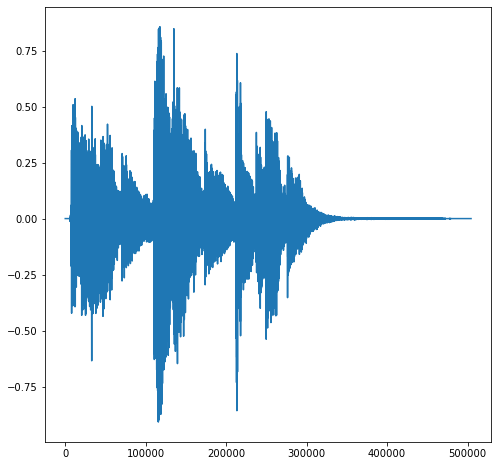

In [83]:
plt.plot(yLeft)